In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from CSV file
df = pd.read_csv("df.csv")

# Drop the 'Unnamed: 0' index column if it exists to clean the dataframe
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Convert the 'CreatedOn' column to datetime objects for time-series analysis
# 'coerce' handles any parsing errors by setting them to NaT
df["CreatedOn"] = pd.to_datetime(df["CreatedOn"], errors="coerce")

In [15]:
# Display basic information about the dataset
# Print the shape (rows, columns) of the dataframe
print("Shape:", df.shape)

# Print data types of each column
print("\nData types:\n", df.dtypes)

# Check for and count missing values in each column
print("\nMissing values:\n", df.isnull().sum())

# Display descriptive statistics (count, mean, std, min, max, etc.) for numeric columns
print("\nDescriptive statistics:\n", df.describe())

Shape: (461797, 4)

Data types:
 Dist Name                str
Pest                     str
CreatedOn     datetime64[us]
pest_count             int64
dtype: object

Missing values:
 Dist Name     0
Pest          0
CreatedOn     0
pest_count    0
dtype: int64

Descriptive statistics:
                         CreatedOn     pest_count
count                      461797  461797.000000
mean   2015-06-22 18:58:52.029875       1.430185
min           2013-01-01 00:00:00       1.000000
25%           2014-07-19 00:00:00       1.000000
50%           2015-06-20 00:00:00       1.000000
75%           2016-06-01 00:00:00       1.000000
max           2017-09-26 00:00:00      59.000000
std                           NaN       1.259776


In [16]:
# Identify the time range of the data
# Print the earliest date in the dataset
print("Start date:", df["CreatedOn"].min())

# Print the latest date in the dataset
print("End date:", df["CreatedOn"].max())

Start date: 2013-01-01 00:00:00
End date: 2017-09-26 00:00:00


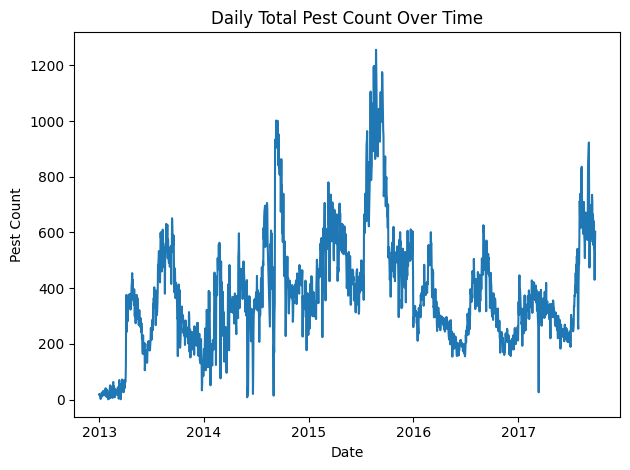

In [17]:
# Aggregate pest counts by day
daily_ts = df.groupby("CreatedOn")["pest_count"].sum()

# Plot the daily pest count trend
plt.figure()
plt.plot(daily_ts)
plt.title("Daily Total Pest Count Over Time")
plt.xlabel("Date")
plt.ylabel("Pest Count")
plt.tight_layout()
plt.show()

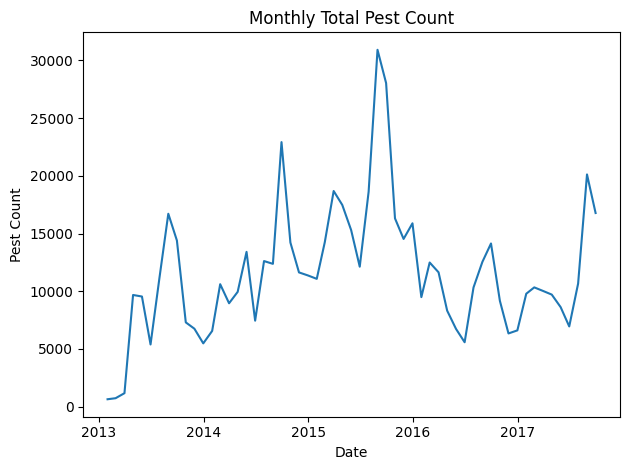

In [18]:
# Resample the data to get monthly sums of pest counts
# 'ME' stands for Month End frequency
monthly_ts = df.set_index("CreatedOn").resample("ME")["pest_count"].sum()

# Plot the monthly pest count trend
plt.figure()
plt.plot(monthly_ts)
plt.title("Monthly Total Pest Count")
plt.xlabel("Date")
plt.ylabel("Pest Count")
plt.tight_layout()
plt.show()

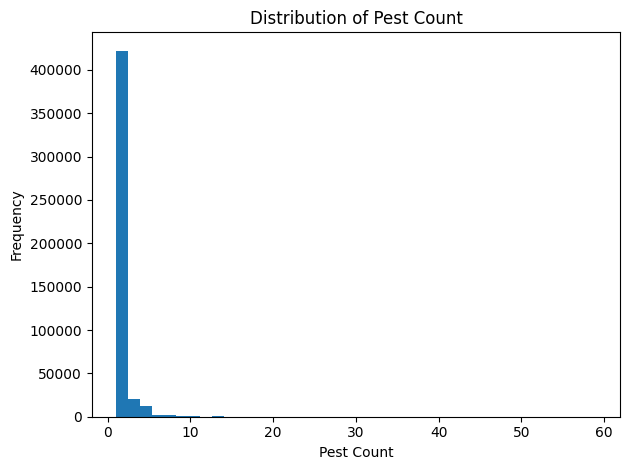

In [19]:
# Visualize the distribution of pest counts using a histogram
plt.figure()
plt.hist(df["pest_count"], bins=40)
plt.title("Distribution of Pest Count")
plt.xlabel("Pest Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

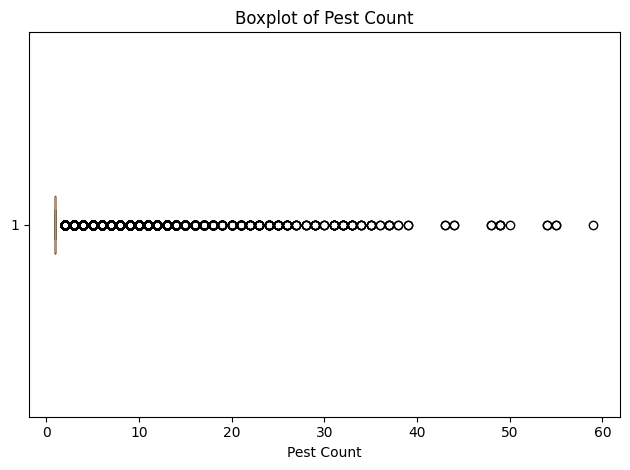

In [20]:
# Create a boxplot to visualize the spread and detect outliers in pest counts
plt.figure()
plt.boxplot(df["pest_count"], vert=False)
plt.title("Boxplot of Pest Count")
plt.xlabel("Pest Count")
plt.tight_layout()
plt.show()

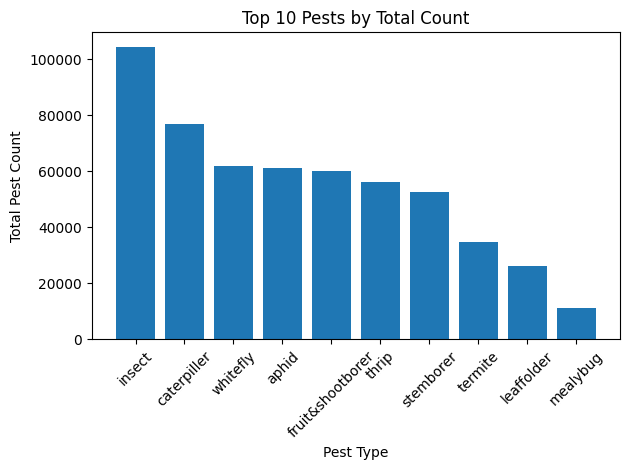

In [21]:
# Identify the top 10 pests by total count
top_pests = (
    df.groupby("Pest")["pest_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 pests
plt.figure()
plt.bar(top_pests.index, top_pests.values)
plt.title("Top 10 Pests by Total Count")
plt.xlabel("Pest Type")
plt.ylabel("Total Pest Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

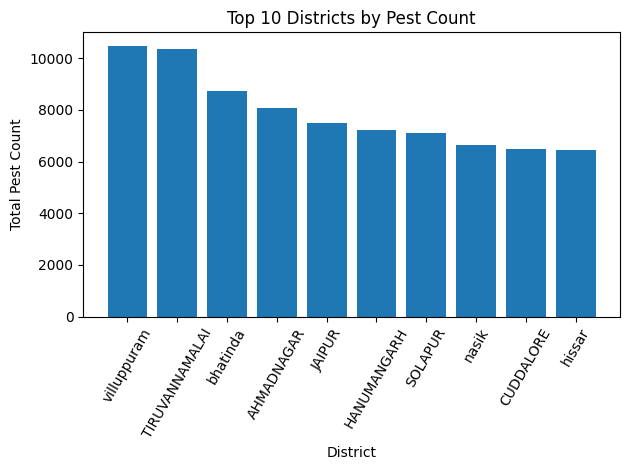

In [22]:
# Identify top 10 districts with the highest pest counts
top_districts = (
    df.groupby("Dist Name")["pest_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 districts
plt.figure()
plt.bar(top_districts.index, top_districts.values)
plt.title("Top 10 Districts by Pest Count")
plt.xlabel("District")
plt.ylabel("Total Pest Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

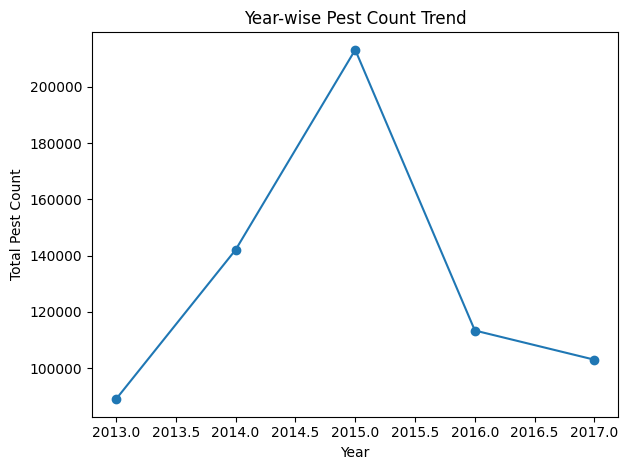

In [23]:
# Extract the year from the CreatedOn date
df["Year"] = df["CreatedOn"].dt.year

# Aggregate total pest counts by year
yearly_ts = df.groupby("Year")["pest_count"].sum()

# Plot the year-wise pest count trend
plt.figure()
plt.plot(yearly_ts.index, yearly_ts.values, marker='o')
plt.title("Year-wise Pest Count Trend")
plt.xlabel("Year")
plt.ylabel("Total Pest Count")
plt.tight_layout()
plt.show()

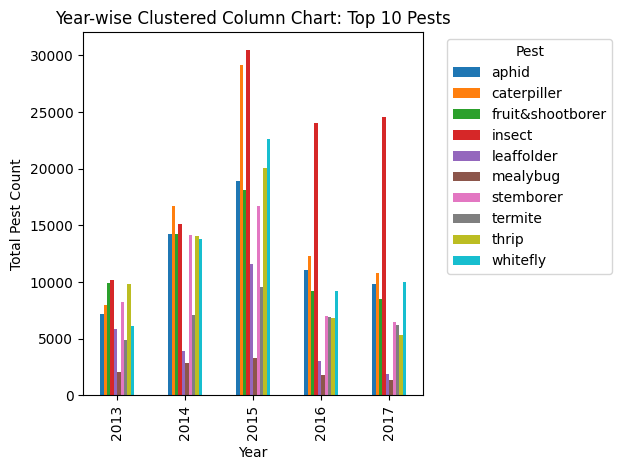

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload dataset to ensure clean state for this block (optional if already loaded)
df = pd.read_csv("df.csv")

# Preprocessing: Clean index and columns
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

df["CreatedOn"] = pd.to_datetime(df["CreatedOn"])
df["Year"] = df["CreatedOn"].dt.year

# Identify the top 10 pests overall for filtering
top_pests = (
    df.groupby("Pest")["pest_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Aggregate data by Year and Pest for the top 10 pests
pest_yearly = (
    df[df["Pest"].isin(top_pests)]
    .groupby(["Year", "Pest"])["pest_count"]
    .sum()
    .reset_index()
)

# Pivot the data to have Years as index and Pests as columns
# This format is required for plotting clustered bar charts
pivot_pest = pest_yearly.pivot(
    index="Year",
    columns="Pest",
    values="pest_count"
).fillna(0)

# Plot clustered column chart comparing top pests over the years
pivot_pest.plot(kind="bar")
plt.title("Year-wise Clustered Column Chart: Top 10 Pests")
plt.xlabel("Year")
plt.ylabel("Total Pest Count")
plt.legend(title="Pest", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

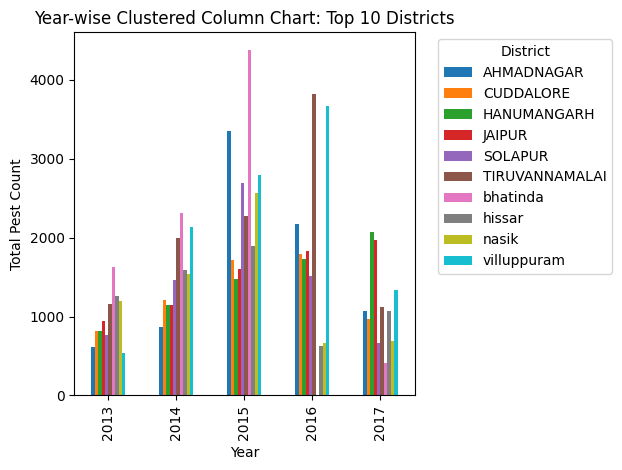

In [25]:
# Identify the top 10 districts overall for filtering
top_districts = (
    df.groupby("Dist Name")["pest_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Aggregate data by Year and District for the top 10 districts
district_yearly = (
    df[df["Dist Name"].isin(top_districts)]
    .groupby(["Year", "Dist Name"])["pest_count"]
    .sum()
    .reset_index()
)

# Pivot the data to have Years as index and Districts as columns
pivot_district = district_yearly.pivot(
    index="Year",
    columns="Dist Name",
    values="pest_count"
).fillna(0)

# Plot clustered column chart comparing top districts over the years
pivot_district.plot(kind="bar")
plt.title("Year-wise Clustered Column Chart: Top 10 Districts")
plt.xlabel("Year")
plt.ylabel("Total Pest Count")
plt.legend(title="District", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()